<a href="https://colab.research.google.com/github/jungyoojang/MachineLearning/blob/main/4_2_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

기존 데이터를 유지하면서 새로운 데이터가 올 때마다 조금씩 훈련시켜야함

**점진적 학습**

- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금만 더 훈련하는 학습 방법

**확률적 경사 하강법(Stochastic Gradient Descent, SGD)**

- 대표적인 점진적 학습 알고리즘

- 훈련 세트에서 랜덤하게 하나의 샘플을 고르고 다음 훈련 세트에서 랜덤한 또 다른 하나의 샘플을 선택하려 전체 샘플을 모두 사용할 때까지 반복

- 샘플을 모두 사용한 경우, 훈련 세트에 모든 샘플을 다시 채워 넣고 단계 반복

**확률적**

- 전체 샘플을 쓰지 않고, 훈련세트에서 딱 하나를 랜덤하게 골라서 훈련(가장 가파른 길 탐색)

- 전체 샘플 다 쓸 때까지 계속 하나씩 꺼내면서 조금씩 하강

**에포크(epoch)**

- 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정

**미니배치 경사 하강법(Minibatch Gradient Descent)**

- 여러 개의 샘플을 사용해 경사하강법을 수행하는 방식

**배치 경사 하강법(Batch Gradient Descent)**

- 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 경우

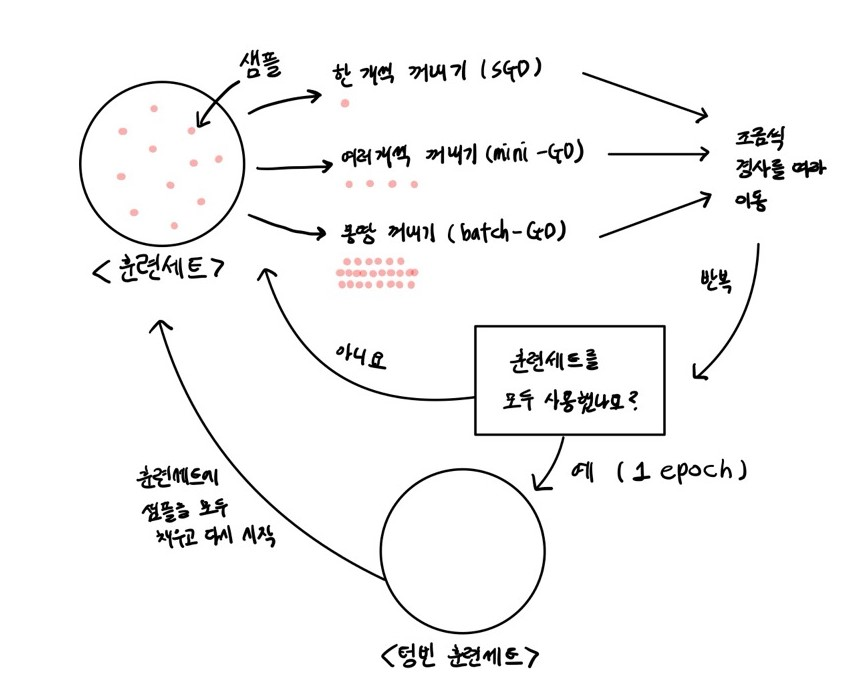

**신경망 알고리즘**

- 확률적 경사 하강법을 꼭 사용하는 알고리즘

**손실 함수(loss function)**

- 특정 알고리즘이 얼마나 나쁜지를 측정하는 기준

- 손실 함수의 값이 작을수록 좋음

- 문제에 필요한 손실 함수는 이미 정의되어 있음

- **연속적이며, 미분가능해야함**

**로지스틱 손실 함수 (or 이진 크로스엔트로피 손실 함수)**

- 정답과 가까운 예측은 '낮은 손실'로 표현되고, 먼 예측은 '높은 손실'로 표현되도록 계산

- 로그함수를 적용해 '높은 손실'일수록 아주 큰 양수값이 되도록!

- 타깃 = 1일 때, -log(예측 확률)

- 타깃 = 0일 때, -log(1 - 예측 확률)

**크로스피엔트로피 손실 함수**

- 다중 분류에서 사용하는 손실 함수



우리는 이미 손실함수를 직접 계산할 필요 없이 사이킷런, 텐서플로 등에 구현되어있는 것을 사용하면 됨

하지만 손실함수가 무엇인지, 왜 정의해야 하는지 이해하는 것이 중요

## SGDClassifier

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # 입력 데이터
fish_target = fish['Species'].to_numpy() # 타깃 데이터

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 훈련 세트와 테스트 세트의 특성을 표준화 전처리까지 동일하게
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

**SGDClassifier 클래스 (loss= 손실 함수의 종류를 지정, max_iter= 수행할 에포크 횟수를 지정)**

- 확률적 경사하강법을 제공하는 분류용 클래스

- loss : 손실함수의 종류를 지정하는 매개변수 ('log' = 로지스틱 손실함수)

- max_iter : 수행할 에포크 횟수를 지정하는 매개변수

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# 모델 훈련
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

# 정확도 점수를 출력
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


- partial_fit(): 모델을 이어서 훈련할 때 사용하는 메서드 (호출할 때마다 1 에포크씩)

In [ ]:
# 확률적 경사 하강법은 점진적 학습이 가능
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


에포크를 한 번 더 실행하니 정확도 향상

## 에포크와 과대/과소적합

에포크가 적으면 훈련세트를 덜 학습해 과소적합되지만

무작정 에포크를 늘려서 많이 훈련하면 또 과대적합이 되어버림

**조기 종료(early stopping)**

- 과대적합이 시작하기 전에 훈련을 멈추는 것

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

# 2개의 리스트 준비
train_score = []
test_score = []

classes = np.unique(train_target)
# partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 전달해줘야함

In [ ]:
for _ in range(0, 300): # 300번의 에포크 동안 훈련 반복
    sc.partial_fit(train_scaled, train_target, classes=classes)
    # 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 리스트에 추가
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

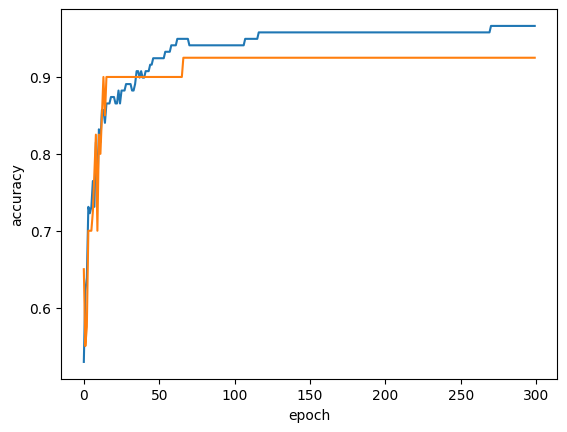

In [ ]:
# 그 동안의 score가 어떻게 나타나는지
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

100번째 에포크 이후에 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있음

이 모델의 경우 100번째 에포크가 적절한 반복 횟수로 보임

- tol: 향상될 최솟값을 지정하는 매개변수 (SGD는 일정 에포크동안 성능향상 없으면 자동으로 멈춤)

In [ ]:
# 반복 횟수= 100
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


정확도 점수가 높게 나오는 것을 확인

**SGDClassifier의 loss 매개변수**

**힌지 손실(hinge loss)**

- 서포트 벡터 머신이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수정도만 알고있기

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


## 정리

업데이트가 가능한 실시간 학습 모델이 필요

-> 점진적으로 학습하는 확률적 경사하강법을 사용

-> 분류 문제니까 로지스틱 손실함수로 정의

-> 확률적 경사하강법(SGDClassifier) 적용

-> 훈련을 점점 반복(partial_fit)할수록 정확도가 높아짐

-> 반복문을 통해서 최적의 에포크를 찾음

-> 최적의 분류 모델